In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [112]:
dia=pd.read_csv("dia.csv")
dia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [113]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [114]:
dia["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

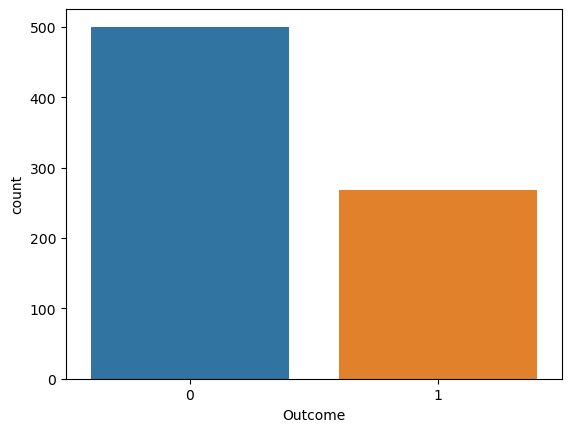

In [115]:
sns.countplot(x='Outcome',data=dia)

<Axes: >

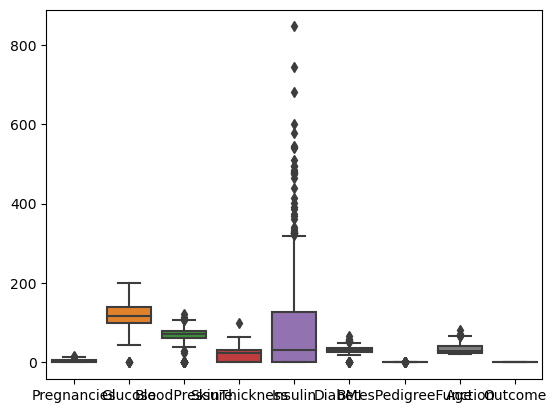

In [116]:
sns.boxplot(dia)

In [117]:
q1=np.percentile(dia['Insulin'],25)
q3=np.percentile(dia['Insulin'],75)
iqr=q3-q1
iqr

127.25

In [118]:
upper=np.where(dia['Insulin']>q3+1.5*iqr)
upper

(array([  8,  13,  54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258,
        286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584,
        612, 645, 655, 695, 707, 710, 715, 753], dtype=int64),)

In [119]:
lower=np.where(dia['Insulin']<q1-1.5*iqr)
lower

(array([], dtype=int64),)

In [120]:
dia.drop(upper[0],inplace=True)

<Axes: >

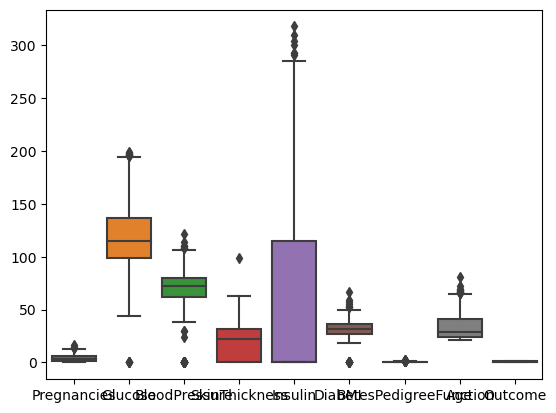

In [121]:
sns.boxplot(dia)

In [122]:
q1=np.percentile(dia['Insulin'],25)
q3=np.percentile(dia['Insulin'],75)
iqr=q3-q1
iqr

115.0

In [123]:
upper=np.where(dia['Insulin']>q3+1.5*iqr)
upper

(array([ 51,  53, 192, 348, 392, 580, 681], dtype=int64),)

In [124]:
#feature engineering
y=dia["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 734, dtype: int64

In [125]:
x=dia.drop("Outcome",axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [126]:
scalar=StandardScaler()
scalar.fit(x)



StandardScaler()

In [127]:
std_data=scalar.transform(x)
std_data

array([[ 0.63831459,  0.92230173,  0.15354684, ...,  0.22061072,
         0.49738548,  1.43631516],
       [-0.84060873, -1.09401241, -0.15257371, ..., -0.66389796,
        -0.36016635, -0.18666744],
       [ 1.22988392,  2.04247626, -0.25461389, ..., -1.08088062,
         0.63720371, -0.1012473 ],
       ...,
       [ 0.34252992,  0.0581671 ,  0.15354684, ..., -0.71444131,
        -0.68951596, -0.27208757],
       [-0.84060873,  0.21819203, -0.45869426, ..., -0.22164362,
        -0.36638049,  1.18005475],
       [-0.84060873, -0.83797252,  0.05150666, ..., -0.18373611,
        -0.47202093, -0.87002853]])

In [128]:
x=std_data
x

array([[ 0.63831459,  0.92230173,  0.15354684, ...,  0.22061072,
         0.49738548,  1.43631516],
       [-0.84060873, -1.09401241, -0.15257371, ..., -0.66389796,
        -0.36016635, -0.18666744],
       [ 1.22988392,  2.04247626, -0.25461389, ..., -1.08088062,
         0.63720371, -0.1012473 ],
       ...,
       [ 0.34252992,  0.0581671 ,  0.15354684, ..., -0.71444131,
        -0.68951596, -0.27208757],
       [-0.84060873,  0.21819203, -0.45869426, ..., -0.22164362,
        -0.36638049,  1.18005475],
       [-0.84060873, -0.83797252,  0.05150666, ..., -0.18373611,
        -0.47202093, -0.87002853]])

In [129]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2,stratify=y)

In [130]:
classifier=svm.SVC(kernel='linear')

In [133]:
classifier.fit(xtrain,ytrain)

SVC(kernel='linear')

In [141]:
train_predict=classifier.predict(xtrain)
train_accuracy=accuracy_score(train_predict,ytrain)
train_accuracy

0.7709090909090909

In [142]:
test_predict=classifier.predict(xtest)
test_accuracy=accuracy_score(test_predict,ytest)
test_accuracy

0.8097826086956522

In [144]:
new_data=(6,148,72,35,0,33.6,0.627,50)
new_data_array=np.asarray(new_data)
new_data_reshape=new_data_array.reshape(1,-1)
prediction=classifier.predict(new_data_reshape)
prediction


array([1], dtype=int64)

In [145]:
if prediction == 0:
    print("yes")
else:
    print("no")

no
